## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則話來觀察訓練情形。

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
boston = datasets.load_boston()
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [73]:
# 讀波士頓房價資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
regr = linear_model.LinearRegression()

# 將訓練資料丟進去模型訓練
regr.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = regr.predict(x_test)

In [74]:
print(regr.coef_)

[-1.14743504e-01  4.70875035e-02  8.70282354e-03  3.23818824e+00
 -1.67240567e+01  3.87662996e+00 -1.08218769e-02 -1.54144627e+00
  2.92604151e-01 -1.33989537e-02 -9.07306805e-01  8.91271054e-03
 -4.58747039e-01]


In [75]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))

Mean squared error: 25.41


# Lasso

In [83]:
# 讀波士頓房價資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
lasso_1 = linear_model.Lasso(alpha=1.0)
lasso_2 = linear_model.Lasso(alpha=10.0)

# 將訓練資料丟進去模型訓練
lasso_1.fit(x_train, y_train)
lasso_2.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = lasso_1.predict(x_test)
y_pred2 = lasso_2.predict(x_test)

In [84]:
# 印出各特徵對應的係數，可以看到許多係數都變成 0，Lasso Regression 的確可以做特徵選取
print(lasso_1.coef_)
print(lasso_2.coef_)

abs(lasso_1.coef_) >= abs(lasso_2.coef_)

[-0.06479441  0.04581271 -0.          0.         -0.          1.17737271
  0.011112   -0.73717556  0.23337442 -0.01550582 -0.69307422  0.00769147
 -0.69322155]
[-0.          0.01832071 -0.          0.          0.          0.
  0.         -0.          0.         -0.011518   -0.          0.00615269
 -0.520369  ]


array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

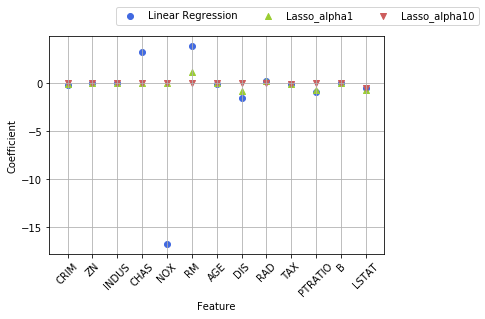

In [88]:
plt.scatter(range(len(regr.coef_)), regr.coef_, marker='o', color='royalblue', label='Linear Regression')
plt.scatter(range(len(lasso_1.coef_)), lasso_1.coef_, marker='^', color='yellowgreen', label='Lasso_alpha1')
plt.scatter(range(len(lasso_2.coef_)), lasso_2.coef_, marker='v', color='indianred', label='Lasso_alpha10')
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.legend(loc=(0.2, 1.05), ncol=3)
plt.grid()

## 可以觀察到alpha大的lasso，W變小，且MSE變大

In [85]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred2))

Mean squared error: 28.95
Mean squared error: 47.63


# Ridge

In [79]:
# 讀波士頓房價資料集
boston = datasets.load_boston()

# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=4)

# 建立一個線性回歸模型
ridge_1 = linear_model.Ridge(alpha=1)
ridge_2 = linear_model.Ridge(alpha=10)

# 將訓練資料丟進去模型訓練
ridge_1.fit(x_train, y_train)
ridge_2.fit(x_train, y_train)

# 將測試資料丟進模型得到預測結果
y_pred = ridge_1.predict(x_test)
y_pred2 = ridge_2.predict(x_test)

In [80]:
# 印出 Ridge 的參數，可以很明顯看到比起 Linear Regression，參數的數值都明顯小了許多
print(ridge_1.coef_)
print(ridge_2.coef_)

abs(ridge_1.coef_) >= abs(ridge_2.coef_)

[-1.11085562e-01  4.79127892e-02 -2.36686153e-02  2.96582333e+00
 -9.35915972e+00  3.92379527e+00 -1.73228057e-02 -1.43323726e+00
  2.74489395e-01 -1.38858412e-02 -8.31911824e-01  9.25837299e-03
 -4.67523596e-01]
[-0.10831418  0.04975703 -0.05350307  2.06651136 -1.86866875  3.73238841
 -0.02131714 -1.31978162  0.265906   -0.01481142 -0.77236967  0.00955695
 -0.49670202]


array([ True, False, False,  True,  True,  True, False,  True,  True,
       False,  True, False, False])

In [81]:
# 預測值與實際值的差距，使用 MSE
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred2))

Mean squared error: 25.73
Mean squared error: 26.23


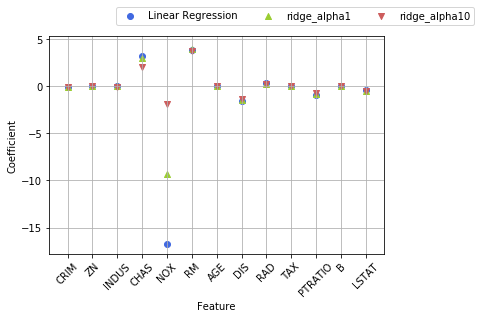

In [90]:
plt.scatter(range(len(regr.coef_)), regr.coef_, marker='o', color='royalblue', label='Linear Regression')
plt.scatter(range(len(ridge_1.coef_)), ridge_1.coef_, marker='^', color='yellowgreen', label='ridge_alpha1')
plt.scatter(range(len(ridge_2.coef_)), ridge_2.coef_, marker='v', color='indianred', label='ridge_alpha10')
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.legend(loc=(0.2, 1.05), ncol=3)
plt.grid()

# Ridge的alpha變大，不見得所有W都變小，但MSE一定變大

## 比較 Lasso、Ridge

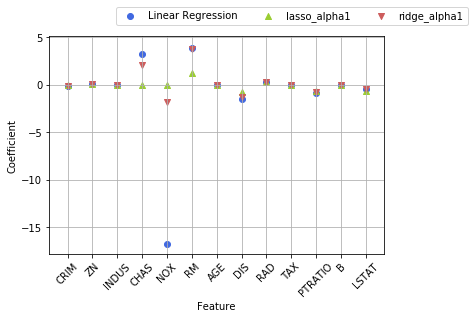

In [91]:
plt.scatter(range(len(regr.coef_)), regr.coef_, marker='o', color='royalblue', label='Linear Regression')
plt.scatter(range(len(lasso_1.coef_)), lasso_1.coef_, marker='^', color='yellowgreen', label='lasso_alpha1')
plt.scatter(range(len(ridge_1.coef_)), ridge_2.coef_, marker='v', color='indianred', label='ridge_alpha1')
plt.xticks(range(len(boston.feature_names)), boston.feature_names, rotation=45)
plt.xlabel('Feature')
plt.ylabel('Coefficient')
plt.legend(loc=(0.2, 1.05), ncol=3)
plt.grid()